<a href="https://colab.research.google.com/github/DebeckGZN/review_classification/blob/main/B2W_reviews_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Base de Dados: B2W Reviews**

Leitura dos dados e identificação dos Headers

In [244]:
import csv
with open('B2W-Reviews01.csv', newline='') as csv_file:
    
    csv_reader = csv.DictReader(csv_file)
    dict_from_csv = dict(list(csv_reader)[0])
    headers = list(dict_from_csv.keys())

print(headers)
    

['submission_date', 'reviewer_id', 'product_id', 'product_name', 'product_brand', 'site_category_lv1', 'site_category_lv2', 'review_title', 'overall_rating', 'recommend_to_a_friend', 'review_text', 'reviewer_birth_year', 'reviewer_gender', 'reviewer_state']


Selecionando apenas as Colunas de Interesse (Texto da Review e Nota)

In [245]:
import pandas as pd

df = pd.read_csv("B2W-Reviews01.csv", usecols = ['review_text','overall_rating'])

print('Dimensão original: ', len(df))
df = df.dropna()

raw_data_size = len(df)

raw_reviews = list(df['review_text'])
raw_score = list(df['overall_rating'])

Dimensão original:  132373


**Visualizando os Dados**

In [246]:
from random import randrange

idx = randrange(raw_data_size)

print(raw_reviews[idx], raw_score[idx])

Produto nem minha casa chegou, como vou diZer que recomendo ? 1


Scores

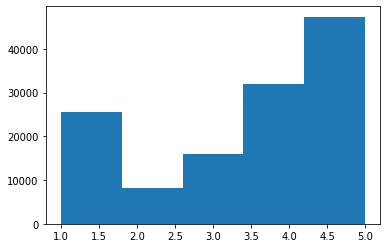

In [247]:
import matplotlib.pyplot as plt

x = raw_score
plt.hist(x, bins = 5, range=(1,5))
plt.show()

Tamanho das Reviews (nº de palavras)

796
Bom material, resolução bem definida. Satisfeita. Recomendaria a compra. 9


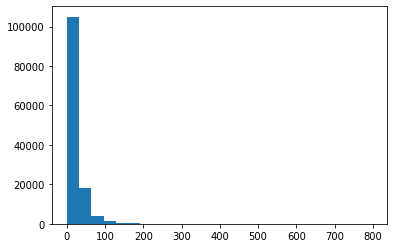

In [248]:
review_len = []

for rv in raw_reviews:
    split_rv = rv.split(' ')
    review_size = len(split_rv)
    review_len.append(review_size)

max_len = 0
for i in review_len:
  if i > max_len:
    max_len = i

print(max_len)
idx = randrange(raw_data_size)
print(raw_reviews[idx], review_len[idx])

x = review_len
plt.hist(x, bins = 25, range=(1,max_len))
plt.show()

**Pré-Processamento**

In [249]:
## removemos reviews notas 3, por não serem totalmente positivas ou negativas
df = df.drop(df[df.overall_rating == 3].index)
df = df.drop(df[df.review_text.str.split().str.len() > 50].index)
data_size = len(df)

pred_sample_size = 1000
predict_sample = df[-pred_sample_size:]

df = df[:data_size - pred_sample_size]
print('Dimensão pós filtros: ', data_size)

reviews = list(df['review_text'])
score = list(df['overall_rating'])

Dimensão pós filtros:  104209


**Transformando Scores em Labels:**

4-5: Positivo [1]

1-2: Negativo [0]

In [250]:
for i, n in enumerate(score):
  if n >3:
    score[i] = 1 ##Positivo
  else:
    score[i] = 0 ##Negativo


**Visualização dos Dados pós processados**

Distribuição Positivo x Negativo

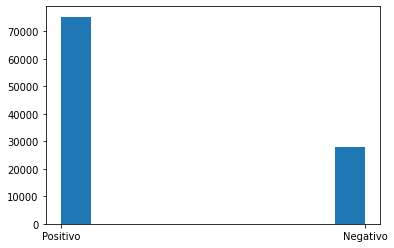

In [251]:
score_tag = []

for i in score:
  if i  == 1:
    score_tag.append('Positivo')
  else:
    score_tag.append('Negativo')


x = score_tag
plt.hist(x, range=(0,1))
plt.show()

Tamanho das Reviews



mercadoria foi enviada errada conforme o pedido  palheta fiat uno 93   trazeira  enviaram a dianteira  já pedi informação de como trocar  até agora não me informaram 32


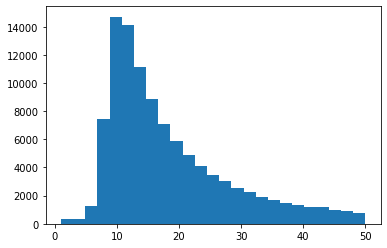

In [252]:
review_len = []

for rv in reviews:
  split_rv = rv.split(' ')
  review_size = len(split_rv)
  review_len.append(review_size)

idx = randrange(data_size)
print(reviews[idx], review_len[idx])

x = review_len
plt.hist(x, bins = 25, range=(1,50))
plt.show()

Separando bases de Treino e Teste

In [253]:
from sklearn.model_selection import train_test_split

training_sentences, testing_sentences, training_labels, testing_labels = train_test_split(reviews, score, test_size=0.2)

Scores

Treino


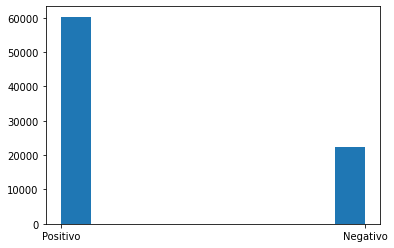

Teste


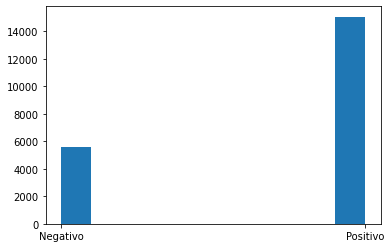

In [254]:
score_tag = []
print('Treino')
for i in training_labels:
  if i  == 1:
    score_tag.append('Positivo')
  else:
    score_tag.append('Negativo')

x = score_tag
plt.hist(x)
plt.show()

score_tag = []
print('Teste')
for i in testing_labels:
  if i  == 1:
    score_tag.append('Positivo')
  else:
    score_tag.append('Negativo')

x = score_tag
plt.hist(x)
plt.show()

Tamanho das Reviews

Treino


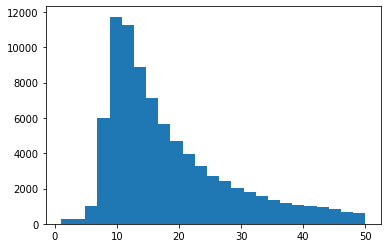

Teste


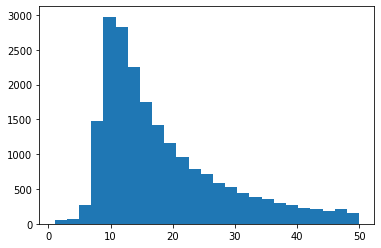

In [255]:
review_len = []
print('Treino')
for rv in training_sentences:
  split_rv = rv.split(' ')
  review_len.append(len(split_rv))

x = review_len
plt.hist(x, bins = 25, range=(1,50))
plt.show()

review_len = []
print('Teste')
for rv in testing_sentences:
  split_rv = rv.split(' ')
  review_len.append(len(split_rv))

x = review_len
plt.hist(x, bins = 25, range=(1,50))
plt.show()

**Tensorflow Libraries**

In [256]:
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import EarlyStopping

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential

**Tokenização**

Dividindo as sentenças em palavras (tokens) e atribuindo um valor numérico

In [257]:
## Tokenizer se aplica apenas a base de Treino
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
print(len(word_index))

34234


Padding e crianção das Sequências

In [258]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, padding='post', maxlen=50)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, padding='post', maxlen=50)


Visualizando as Sequências

In [265]:
keys = list(word_index.keys())
values = list(word_index.values())

idx = randrange(len(training_sequences))

ex_sentence = ''

for i in training_sequences[idx]:
  ex_sentence += ' ' + keys[values.index(i)]

print(ex_sentence, training_labels[idx])


 adorei e fica bem <OOV> para o ambiente recomendo 1


Formatação para Treinamento

In [266]:
import numpy as np

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

Criação do Modelo

In [268]:
vocab_size = 5000
embedding_dim = 16
max_length = 50
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(256, 
                          kernel_regularizer=tf.keras.regularizers.l1(0.01), 
                          activity_regularizer=tf.keras.regularizers.l2(0.01),
                          activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 50, 16)            80000     
                                                                 
 global_average_pooling1d_13  (None, 16)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_26 (Dense)            (None, 256)               4352      
                                                                 
 dense_27 (Dense)            (None, 1)                 257       
                                                                 
Total params: 84,609
Trainable params: 84,609
Non-trainable params: 0
_________________________________________________________________


Treinamento

In [269]:
num_epochs = 100
es = EarlyStopping(monitor='val_loss', patience = 10, restore_best_weights=True, verbose=1)
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1, callbacks=[es])

Epoch 1/100
2581/2581 [==============================] - 10s 4ms/step - loss: 0.6513 - accuracy: 0.7300 - val_loss: 0.5896 - val_accuracy: 0.7301
Epoch 2/100
2581/2581 [==============================] - 9s 4ms/step - loss: 0.4671 - accuracy: 0.7999 - val_loss: 0.3324 - val_accuracy: 0.8922
Epoch 3/100
2581/2581 [==============================] - 9s 4ms/step - loss: 0.2837 - accuracy: 0.9164 - val_loss: 0.2500 - val_accuracy: 0.9275
Epoch 4/100
2581/2581 [==============================] - 9s 3ms/step - loss: 0.2345 - accuracy: 0.9326 - val_loss: 0.2217 - val_accuracy: 0.9323
Epoch 5/100
2581/2581 [==============================] - 9s 3ms/step - loss: 0.2115 - accuracy: 0.9399 - val_loss: 0.2049 - val_accuracy: 0.9378
Epoch 6/100
2581/2581 [==============================] - 8s 3ms/step - loss: 0.1977 - accuracy: 0.9447 - val_loss: 0.1976 - val_accuracy: 0.9418
Epoch 7/100
2581/2581 [==============================] - 8s 3ms/step - loss: 0.1873 - accuracy: 0.9471 - val_loss: 0.1879 - val_a

Desempenho do modelo

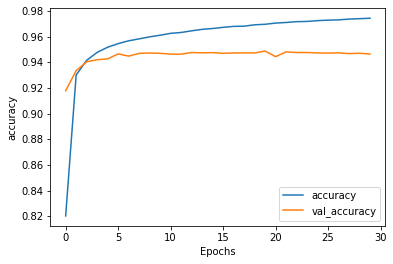

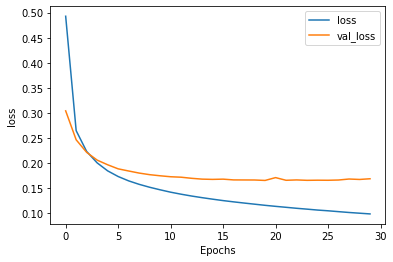

In [159]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

Predição

In [163]:
sample_sentences = list(predict_sample['review_text'])
sample_scores = list(predict_sample['overall_rating'])

sequences = tokenizer.texts_to_sequences(sample_sentences)
padded = pad_sequences(sequences, padding='post', maxlen=50,truncating='post')

predictions = model.predict(padded)

idx = randrange(len(sample_sentences))

pred = predictions[idx]
sentence = sample_sentences[idx]
score = sample_scores[idx]

print(sentence, score, pred)

Gostei muito e recomendo. Tv muito boa  , superou minha expectativa. Foi difícil achar uma boa tv com 28polegadas. Quem comprar não vai se arrepender. 5 [0.9995009]


**Outliers**

In [165]:
outliers = []

for lines in range(len(predictions)):
    s = sample_scores[lines]
    p = predictions[lines]
    st = sample_sentences[lines]

    if s>3:
      if p<0.5:
        outliers.append([st, s, p[0]])
    else:
      if p>0.5:
        outliers.append([st, s, p[0]])

print(len(outliers))

idx = randrange(len(outliers))

print(outliers[idx][0],outliers[idx][1],outliers[idx][2])


48
Quero alertar a todos os consumidores a não comprarem nenhum produto da parceira avalanche shop, e uma empresa picareta, que recebe o pagamento em dinheiro e quando a compra e cancelada só devolve se for pela justiça. Att. Jules 5 0.016206563
